<a href="https://colab.research.google.com/github/praveen535/ML-PROJECTS/blob/main/Forest_Cover_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Overview**

**Elevation** - Elevation in meters

**Aspect** - Aspect in degrees azimuth

**Slope** - Slope in degrees

**Horizontal_Distance_To_Hydrology ** -** Horz Dist to nearest surface water features**

**Vertical_Distance_To_Hydrology** - Vert Dist to nearest surface water features

**Horizontal_Distance_To_Roadways** - Horz Dist to nearest roadway

**Hillshade_9am (0 to 255 index)** - Hillshade index at 9am, summer solstice

**Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice

**Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice

**Horizontal_Distance_To_Fire_Points** - Horz Dist to nearest wildfire ignition points

**Wilderness_Area (4 binary columns, 0 = absence or 1 = presence)** - Wilderness area designation

**Soil_Type (40 binary columns, 0 = absence or 1 = presence)** - Soil Type designation

**Cover_Type (7 types, integers 1 to 7)** - Forest Cover Type designation

# **Importing Library**

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import math

warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression



# **Reading Forest Cover Data**

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Kaggle/covtype.csv')
print("number of datapoints",data.shape[0])
print("number of features",data.shape[1])
data.head()

number of datapoints 581012
number of features 55


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

# **Check for missing values & variable types**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
data[data.isnull().any(axis=1)]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [7]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


# **Exploratory Data Analysis**

In [8]:
data['Cover_Type']=data['Cover_Type']-1
data['Cover_Type'].value_counts()

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: Cover_Type, dtype: int64

In [9]:
data.Cover_Type.unique()

array([4, 1, 0, 6, 2, 5, 3])

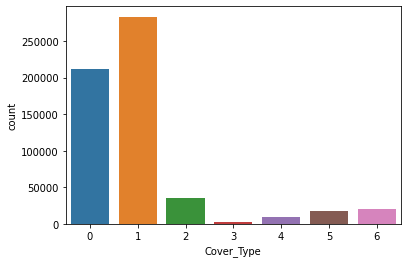

In [10]:
ax = sns.countplot(x="Cover_Type", data=data)

In [11]:
data.corr()["Cover_Type"]

Elevation                            -0.269554
Aspect                                0.017080
Slope                                 0.148285
Horizontal_Distance_To_Hydrology     -0.020317
Vertical_Distance_To_Hydrology        0.081664
Horizontal_Distance_To_Roadways      -0.153450
Hillshade_9am                        -0.035415
Hillshade_Noon                       -0.096426
Hillshade_3pm                        -0.048290
Horizontal_Distance_To_Fire_Points   -0.108936
Wilderness_Area1                     -0.203913
Wilderness_Area2                     -0.048059
Wilderness_Area3                      0.066846
Wilderness_Area4                      0.323200
Soil_Type1                            0.090828
Soil_Type2                            0.118135
Soil_Type3                            0.068064
Soil_Type4                            0.099672
Soil_Type5                            0.077890
Soil_Type6                            0.112958
Soil_Type7                           -0.000496
Soil_Type8   

(array([211840., 283301.,      0.,  35754.,      0.,   2747.,   9493.,
             0.,  17367.,  20510.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

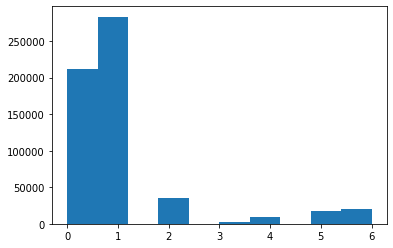

In [12]:
plt.hist(data["Cover_Type"])


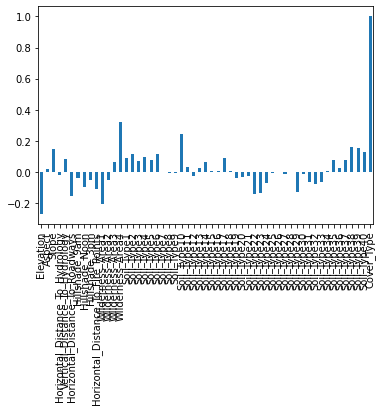

In [13]:
data.corr()["Cover_Type"].plot(kind="bar")


In [14]:
df1=data.iloc[:,0:14]
df2=data['Cover_Type']
df1=df1.join(df2)
df1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,4
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,4
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,1
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,1
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,4


In [15]:
df1.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,0.131838,0.238164,0.066550,-0.619374,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,-0.140123,0.055988,0.074904,0.082687,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,-0.234576,-0.036253,0.125663,0.255503,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.097124,0.055726,0.122028,-0.100433,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,-0.180710,-0.008709,0.146839,0.077792,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,0.453913,-0.200411,-0.232933,-0.270349,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,0.201299,-0.006181,-0.100565,-0.200282,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,0.028728,0.042392,0.048646,-0.195733,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,-0.115155,0.034707,0.090757,0.018860,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,0.380568,0.027473,-0.277510,-0.236548,-0.108936


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text major ticklabel objects>)

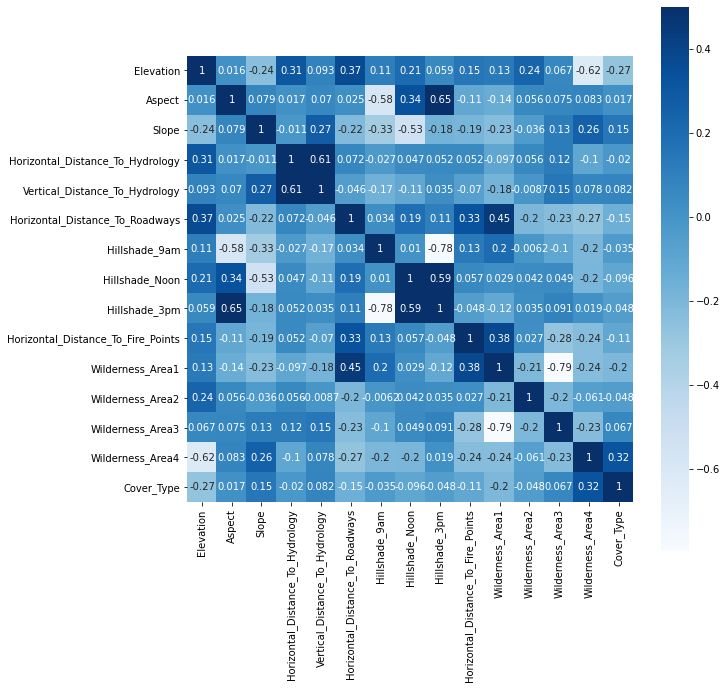

In [16]:
fig = plt.subplots(figsize=(10,10))
sns.heatmap(df1.corr(),vmax=0.5,square=True,annot=True,cmap='Blues')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

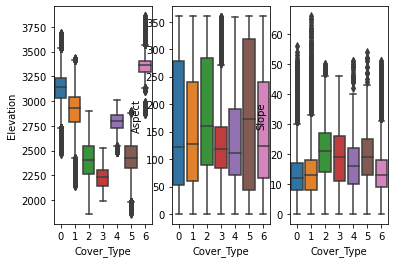

In [17]:
fig,axs=plt.subplots(ncols=3)
sns.boxplot(x='Cover_Type',y='Elevation',data=data,ax=axs[0])#highest in 1 & 7 lowest in 4
sns.boxplot(x='Cover_Type',y='Aspect',data=data,ax=axs[1])
sns.boxplot(x='Cover_Type',y='Slope',data=data,ax=axs[2])

# **RANDOM FOREST CLASSIFIER WITH HYPERPARAMETER TUNING**

In [18]:
X=data.drop('Cover_Type',axis=1)
y=data['Cover_Type']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [20]:
alpha = [100,200]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df,y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df,y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 


best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 0.7187198500489698
for n_estimators = 100 and max depth =  10
Log Loss : 0.5762323951842778
for n_estimators = 200 and max depth =  5
Log Loss : 0.7172535608005047
for n_estimators = 200 and max depth =  10
Log Loss : 0.5749723215647523
For values of best estimator =  200 The train log loss is: 0.5632287211442593
For values of best estimator =  200 The cross validation log loss is: 0.5749723215642829
For values of best estimator =  200 The test log loss is: 0.5762818665077413


**Training and Testing the model with best hyperparameter - RF**

In [21]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)
pred_y = sig_clf.predict(X_test)

In [22]:
accuracy_score(y_test, pred_y)

0.7605397451012452

In [23]:
cf_matrix=confusion_matrix(y_test,pred_y)
print(cf_matrix)

[[32167 10009     3     0    36     0   342]
 [10594 45278   257     5   148   194    24]
 [    0   935  5804    51     1   330     0]
 [    0     0   157   352     0    17     0]
 [   17  1472    16     0   489     1     0]
 [    0  1083   899    24     0  1483     0]
 [ 1198    13     0     0     0     0  2804]]


In [24]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74     42557
           1       0.77      0.80      0.79     56500
           2       0.81      0.82      0.81      7121
           3       0.81      0.67      0.73       526
           4       0.73      0.25      0.37      1995
           5       0.73      0.43      0.54      3489
           6       0.88      0.70      0.78      4015

    accuracy                           0.76    116203
   macro avg       0.78      0.63      0.68    116203
weighted avg       0.76      0.76      0.76    116203



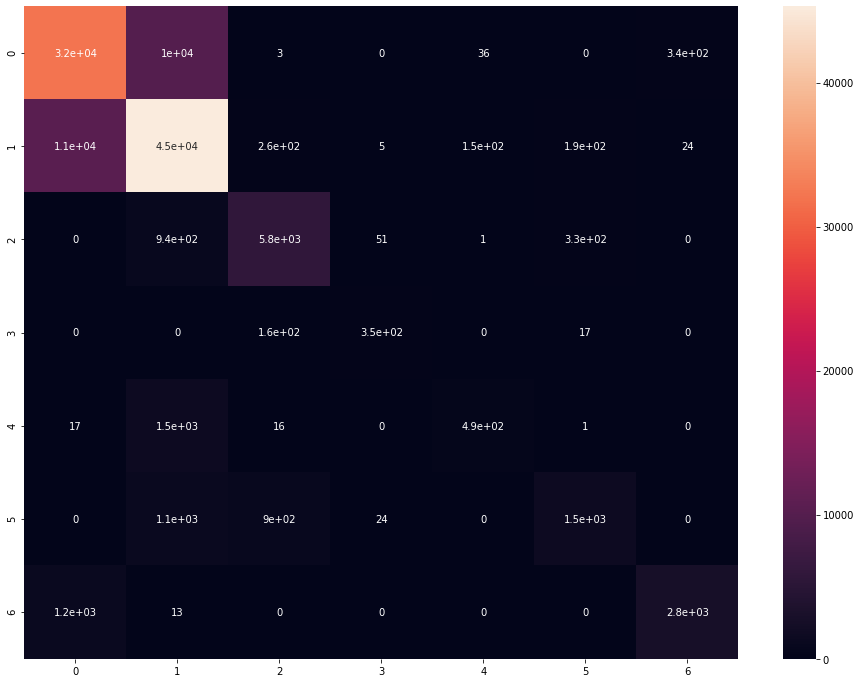

In [25]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(cf_matrix,annot=True)

# **Standadization**

In [26]:
X=data.drop('Cover_Type',axis=1)
y=data['Cover_Type']

In [27]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

# **Principal Component Analysis**

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
principle=pca.fit_transform(x)


In [29]:
x=pd.DataFrame(data=principle,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13'])
x.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13
0,-2.441809,1.289841,-0.865162,-0.286480,-0.865904,0.677715,0.551218,-0.287169,1.319631,-0.134415,0.187358,-0.176092,0.257874
1,-2.454375,1.241212,-1.035727,-0.495760,-0.861841,0.631851,0.543352,-0.273318,1.327685,-0.120589,0.189476,-0.175444,0.249137
2,-2.721385,0.761065,-0.624315,0.163729,-1.121348,1.619867,3.012250,0.920779,-0.988593,0.371794,-0.420940,0.025841,-0.200032
3,-2.107694,1.139537,0.000734,1.317806,-0.780162,0.329801,0.764679,1.780967,-1.292741,-0.474841,-0.901423,-0.955689,-0.633042
4,-2.449243,1.336935,-1.011173,-0.559496,-0.846905,0.538298,0.534887,-0.278319,1.313267,-0.115427,0.194527,-0.178076,0.254072


# **Train Test and Cross Validation**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [31]:
x.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13
0,-2.441809,1.289841,-0.865162,-0.286480,-0.865904,0.677715,0.551218,-0.287169,1.319631,-0.134415,0.187358,-0.176092,0.257874
1,-2.454375,1.241212,-1.035727,-0.495760,-0.861841,0.631851,0.543352,-0.273318,1.327685,-0.120589,0.189476,-0.175444,0.249137
2,-2.721385,0.761065,-0.624315,0.163729,-1.121348,1.619867,3.012250,0.920779,-0.988593,0.371794,-0.420940,0.025841,-0.200032
3,-2.107694,1.139537,0.000734,1.317806,-0.780162,0.329801,0.764679,1.780967,-1.292741,-0.474841,-0.901423,-0.955689,-0.633042
4,-2.449243,1.336935,-1.011173,-0.559496,-0.846905,0.538298,0.534887,-0.278319,1.313267,-0.115427,0.194527,-0.178076,0.254072


# **KNearest Neighbors With Hyperparameter Tuning**

for alpha = 5
Log Loss : 0.2929923182142312
for alpha = 11
Log Loss : 0.3247465574465982
for alpha = 15
Log Loss : 0.3441548653026802
for alpha = 21
Log Loss : 0.36803214904397524
for alpha = 31
Log Loss : 0.4000896230436541
for alpha = 41
Log Loss : 0.42440615510623675
for alpha = 51
Log Loss : 0.4437615775061319
for alpha = 99
Log Loss : 0.5029031867570815


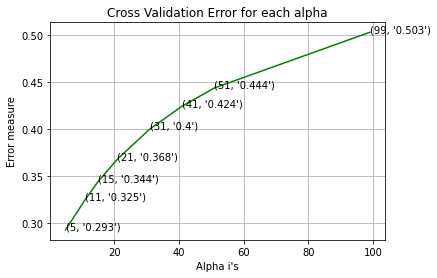

For values of best alpha =  5 The train log loss is: 0.20501310946838344
For values of best alpha =  5 The cross validation log loss is: 0.2929923182142312
For values of best alpha =  5 The test log loss is: 0.2959160221429567


In [32]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df,y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**Training and Testing the model with best hyper paramters -KNN**

In [33]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)
pred_y = sig_clf.predict(X_test)

In [34]:
accuracy_score(y_test, pred_y)

0.8921112191595741

In [35]:
cf_matrix=confusion_matrix(y_test,pred_y)
print(cf_matrix)

[[37744  4498     5     0    34    12   264]
 [ 3542 52218   239     1   238   231    31]
 [   13   384  6106    61    20   537     0]
 [    0     3   126   355     0    42     0]
 [   71   665    26     0  1222    11     0]
 [   17   350   654    28     3  2437     0]
 [  373    57     0     0     1     0  3584]]


In [36]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     42557
           1       0.90      0.92      0.91     56500
           2       0.85      0.86      0.86      7121
           3       0.80      0.67      0.73       526
           4       0.81      0.61      0.70      1995
           5       0.75      0.70      0.72      3489
           6       0.92      0.89      0.91      4015

    accuracy                           0.89    116203
   macro avg       0.85      0.79      0.82    116203
weighted avg       0.89      0.89      0.89    116203



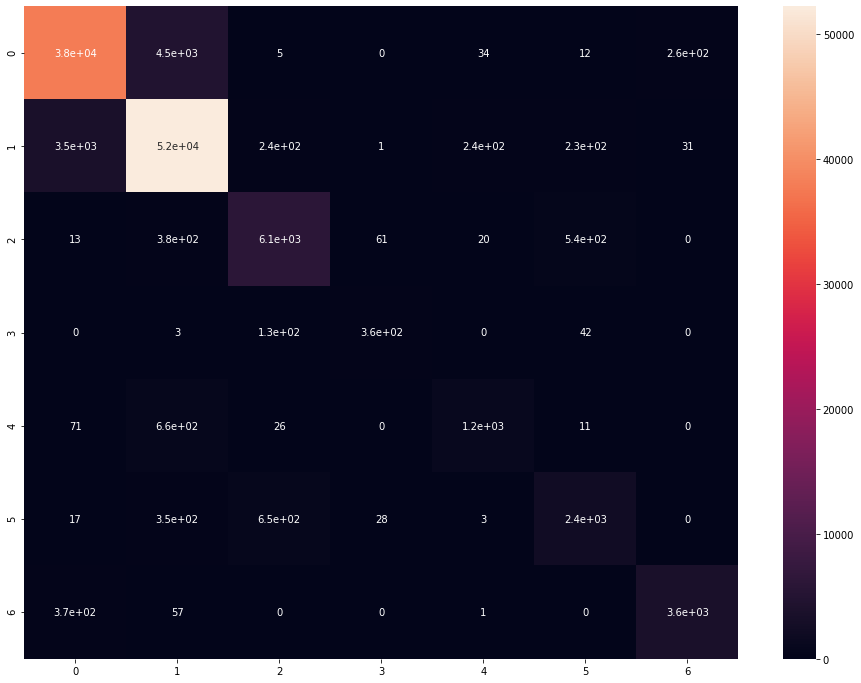

In [37]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(cf_matrix,annot=True)

# **Support Vector Machine With Hyperparameter Tuning**

for C = 1
Log Loss : 0.8710775441574714
for C = 10
Log Loss : 0.8668758598485764
for C = 100
Log Loss : 0.8466951903544243
for C = 1000
Log Loss : 0.8466951856232053


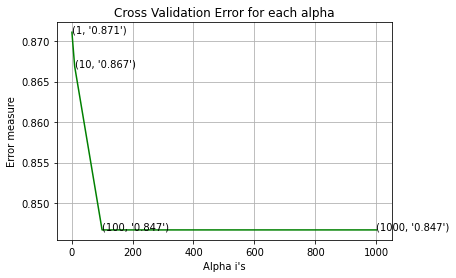

For values of best alpha =  1000 The train log loss is: 0.8467349933871567
For values of best alpha =  1000 The cross validation log loss is: 0.8466951856232053
For values of best alpha =  1000 The test log loss is: 0.8508401014175772


In [38]:
from sklearn.linear_model import SGDClassifier
alpha = [1, 10, 100, 1000]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df,y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

**Training and testing the model with best hyperparameter - SVM**

In [39]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)
pred_y = sig_clf.predict(X_test)

In [40]:
accuracy_score(y_test, pred_y)

0.636351901413905

In [41]:
cf_matrix=confusion_matrix(y_test,pred_y)
print(cf_matrix)

[[19643 22676     0     0     0     0   238]
 [ 5994 49821   619     0     3     0    63]
 [    0  2893  4228     0     0     0     0]
 [    0    49   477     0     0     0     0]
 [  110  1885     0     0     0     0     0]
 [    0  1590  1898     1     0     0     0]
 [ 3236   525     0     0     0     0   254]]


In [42]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.68      0.46      0.55     42557
           1       0.63      0.88      0.73     56500
           2       0.59      0.59      0.59      7121
           3       0.00      0.00      0.00       526
           4       0.00      0.00      0.00      1995
           5       0.00      0.00      0.00      3489
           6       0.46      0.06      0.11      4015

    accuracy                           0.64    116203
   macro avg       0.34      0.29      0.28    116203
weighted avg       0.60      0.64      0.60    116203



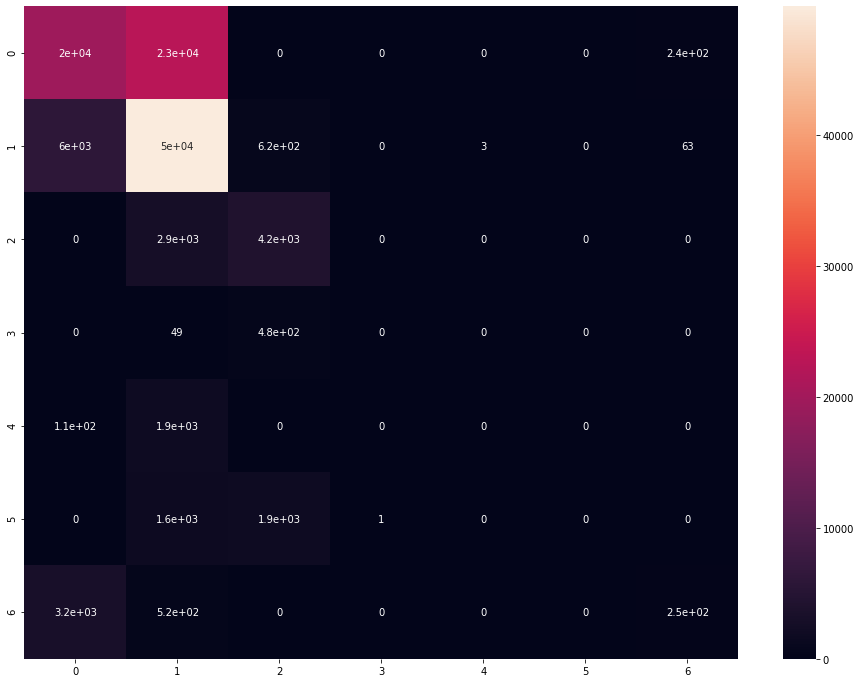

In [43]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(cf_matrix,annot=True)